In [0]:
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression

<h3> Задача1</h3>
<p> Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.</p>

In [0]:
zp = np.array( [35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [0]:
X = zp
y = ks

In [0]:
b1 = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X) ** 2)
print("Коэффициент при x ", b1)

Коэффициент при x  2.620538882402765


In [0]:
a1 = np.mean(y) - b1 * np.mean(X)
print("Пересечение с осью y ", a1)

Пересечение с осью y  444.1773573243596


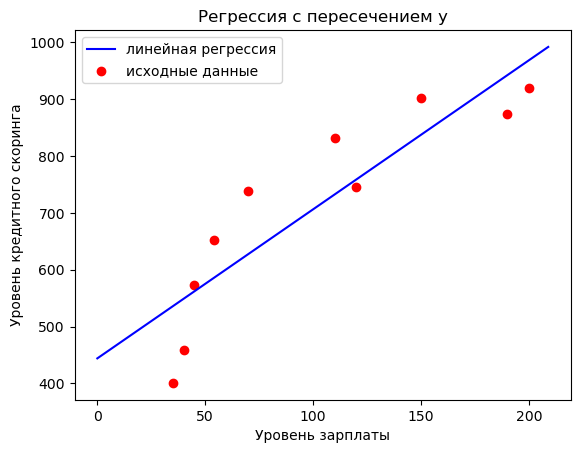

In [0]:
# визулизируем результат
import matplotlib.pyplot as plt
zp_i = np.arange(0, zp.max()+10).reshape(-1,1)
y_r = b1*zp_i + a1
plt.scatter(X,y, c = 'red', label = 'исходные данные')
plt.plot(zp_i, y_r, c = 'b', label = 'линейная регрессия')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Уровень кредитного скоринга')
plt.title('Регрессия с пересечением y')
plt.legend(loc ='best')
plt.show()

In [0]:
# регрессия без пересечения с осью y, b = 0

b11 = np.mean(X*y) / np.mean(X**2)
print("Коэффициент подели y = b*x", b11)

Коэффициент подели y = b*x 5.889820420132688


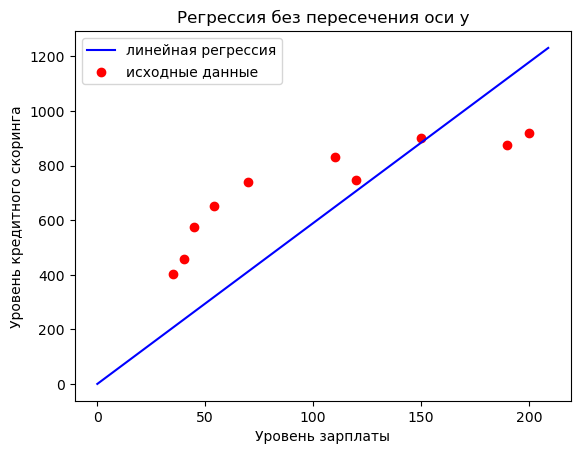

In [0]:
# визулизируем результат
zp_i = np.arange(0, zp.max()+10).reshape(-1,1)
y_r1 = b11*zp_i
plt.scatter(X,y, c = 'red', label = 'исходные данные')
plt.plot(zp_i, y_r1, c = 'b', label = 'линейная регрессия')
plt.title('Регрессия без пересечения оси y')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Уровень кредитного скоринга')
plt.legend(loc ='best')
plt.show()

In [0]:
#проверка
l_reg = LinearRegression(fit_intercept= True) # рачет регрессии с пересечением оси y
l_reg.fit(X.reshape(-1,1),y)
print("Коэффициенты регрессии ", l_reg.coef_[0], l_reg.intercept_)


l_reg1 = LinearRegression(fit_intercept = False) # расчет линейной регрессии без пересечения с осью y
l_reg1.fit(X.reshape(-1,1), y)
print(" Коэффициенты регрессии ", l_reg1.coef_)

Коэффициенты регрессии  2.620538882402765 444.1773573243596
 Коэффициенты регрессии  [5.88982042]


<h3> Задача2 </h3>
<p> Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).</p>

Функцию средней квадратической ошибки обозначим как L, уравнение регрессии y = a*x, тогда функция ошибок примет вид
$L(a) = \sum\limits_{i=1}^n (a*x-y)^2/ n $, для вычисления градиента необходимо вычислить производную данной функции
$dL/da = 2/n * \sum\limits_{i=1}^n (a*x-y)*x $ Оптимальное значени а будет находится в точке где функция потерь  L будет принимать минимальное значение.

In [0]:
lr = 1e-6 # скорость обучения 
a2 = 10 # начальное значение

history = {'a': [], 'lse':[], 'iter':[]} # словарь для хранения рассчетов
for i in range(1000):
    a2 -= lr*(2/len(X))* np.sum((a2*X-y)*X)
    history['a'].append(a2)  
    history['lse'].append((2/len(X))* np.sum((a2*X-y)*X))
    history['iter'].append(i)

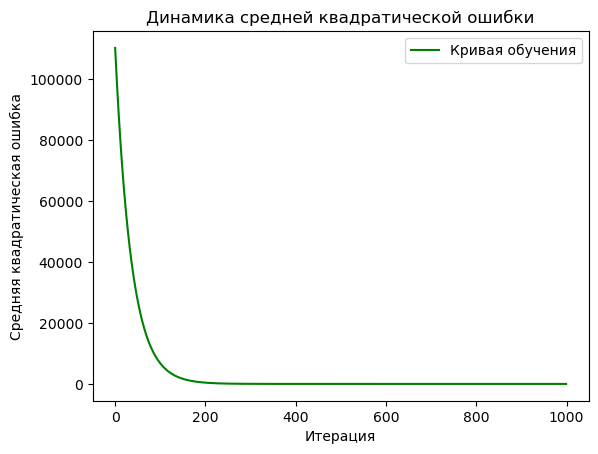

In [0]:
plt.title('Динамика средней квадратической ошибки')
plt.plot(history['iter'], history['lse'], c = 'green', label = 'Кривая обучения')
plt.xlabel("Итерация")
plt.ylabel("Средняя квадратическая ошибка")
plt.legend(loc = 'best')
plt.show()

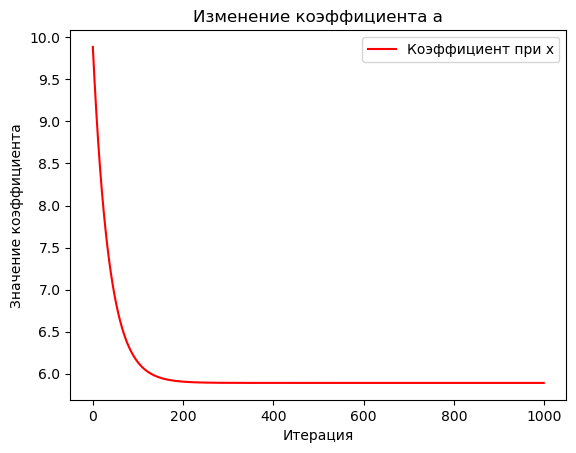

In [0]:
plt.title('Изменение коэффициента а')
plt.plot(history['iter'], history['a'], c = 'red', label = 'Коэффициент при x')
plt.xlabel("Итерация")
plt.ylabel("Значение коэффициента")
plt.legend(loc = 'best')
plt.show()

In [0]:
a3 = history['a'] # градиент "сошелся" уже полсе 200 итерации, переобучения не наблиюдается"
print("Значение коэффициента a ",a3[-1]) 

Значение коэффициента a  5.889820420135707


<h3> Задача3</h3>
<p> В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?</p>

<p> В случаях, когда известна дисперсия генеральной совокупности используется Таблица значений функции Лапласа, в случаях когда дисперсия генеральной совокупности не известка (имеются только данные выборок) применяют критерий Стьюдента<p>

<h3> Задача4</h3>
<p> Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).</p>

In [0]:
# вычисления производятся уже через частные производные функции ошибок имеющей два аргумента L(a,b)
#  модель y = ax + b 
a4 = 0
b4 = 440 # начальные значения переменных 

lr2 = 0.00001

history2 = {'a': [], 'b': [], 'lse':[], 'iter':[]}
for i in range(10000):
    da = lr2 * (2/len(X))* np.sum((a4*X+b4-y)*X)
    db = lr2 * (2/len(X))* np.sum(a4*X+b4-y)
    a4 -= da
    b4 -= db
    history2['a'].append(a4)  
    history2['b'].append(b4) 
    history2['lse'].append(1/(len(X)*np.sum((a4*X+b4-y)**2)))
    history2['iter'].append(i)

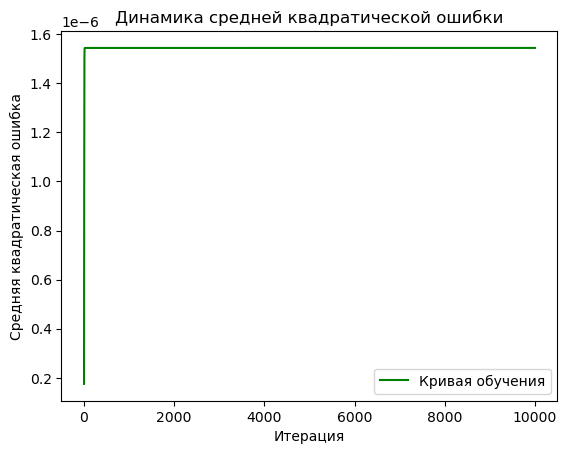

In [0]:
# график средней квадратической ошибки
plt.title('Динамика средней квадратической ошибки')
plt.plot(history2['iter'], history2['lse'], c = 'green', label = 'Кривая обучения')
plt.xlabel("Итерация")
plt.ylabel("Средняя квадратическая ошибка")
plt.legend(loc = 'best')
plt.show()

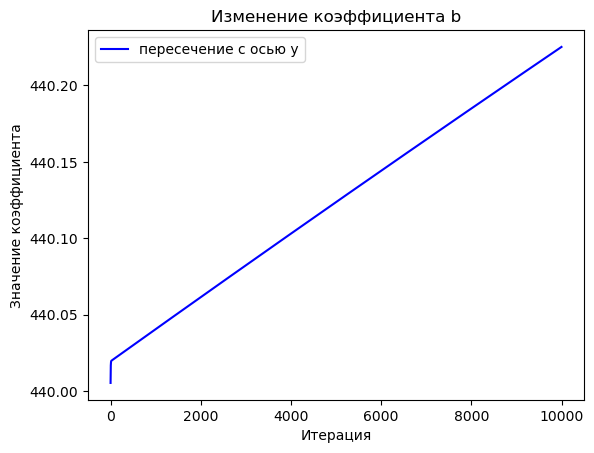

In [0]:
# графики коэффициентов

plt.title('Изменение коэффициента а')
plt.plot(history2['iter'], history2['a'], c = 'red', label = 'Коэффициент при x')
plt.xlabel("Итерация")
plt.ylabel("Значение коэффициента")
plt.legend(loc = 'best')
plt.show()

plt.title('Изменение коэффициента b')
plt.plot(history2['iter'], history2['b'], c = 'blue', label = 'пересечение с осью y')
plt.xlabel("Итерация")
plt.ylabel("Значение коэффициента")
plt.legend(loc = 'best')
plt.show()

In [0]:
a44 = history2['a']
b44 = history2['b']

print(f"Параметры регрессии Y = {round(a44[-1],2)}*x+{round(b44[-1],2)}")

Параметры регрессии Y = 2.65*x+440.23
